In [1]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
tickers = ['BTC-USD', '^GSPC', 'GC=F', 'NG=F']
df = yf.download(tickers, start='2023-01-01', end='2024-12-31')
df = df['Close'].rename(columns={
    'BTC-USD':'Bitcoin', 
    'GC=F':'Gold', 
    'NG=F':'Natural Gas', 
    '^GSPC':'S&P500'
}).dropna()

C:\Users\arthu\AppData\Local\Temp\ipykernel_21224\950617554.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2023-01-01', end='2024-12-31')
[*********************100%***********************]  4 of 4 completed


In [3]:
df_returns = df.pct_change().dropna()

cov_matrix = df_returns.corr()

weights = np.array([0.1, 0.3, 0.3, 0.3])

port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))

In [4]:
cov_contrib = np.dot(cov_matrix,weights)
weighted_contrib = weights*cov_contrib
RC = weighted_contrib/port_volatility

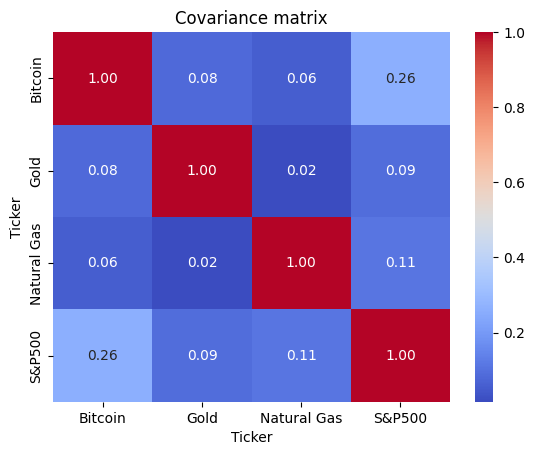

In [5]:
#Covariance visualisation
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Covariance matrix')
plt.show()

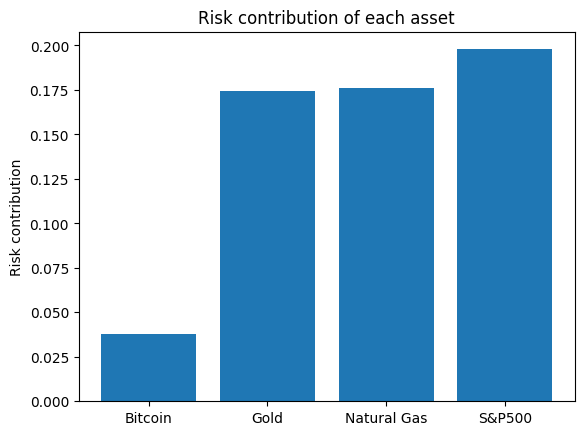

In [6]:
#Risk contribution
plt.bar(df_returns.columns, RC)
plt.ylabel('Risk contribution')
plt.title('Risk contribution of each asset')
plt.show()

There might be a mistake regarding the low contribution of Bitcoin to the portfolio. However, Bitcoin represents only 10% of the portfolio thus potentially explaining its low risk contribution.